In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
##REad the dataset
df=pd.read_csv('height-weight.csv')

In [20]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

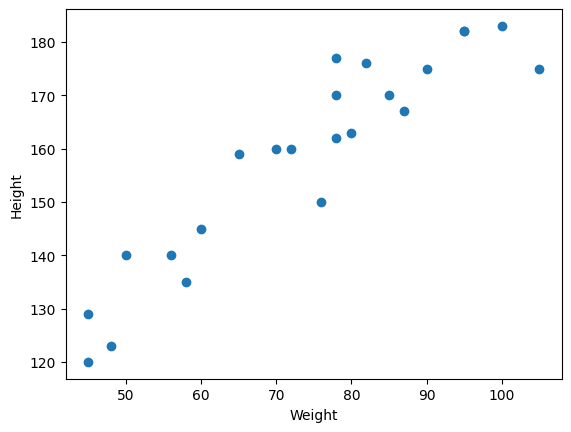

In [21]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [22]:
##divide our dataset into independent and dependent features
X=df['Weight']
y=df['Height']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [25]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [26]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

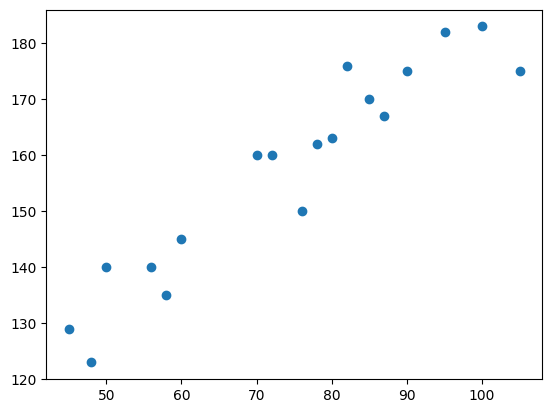

In [27]:
plt.scatter(X_train,y_train)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()

In [30]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
type(X_train)

pandas.core.series.Series

In [32]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [33]:
y_train.shape

(18,)

In [34]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [0.9630459]
Intercept :  85.96709053063559


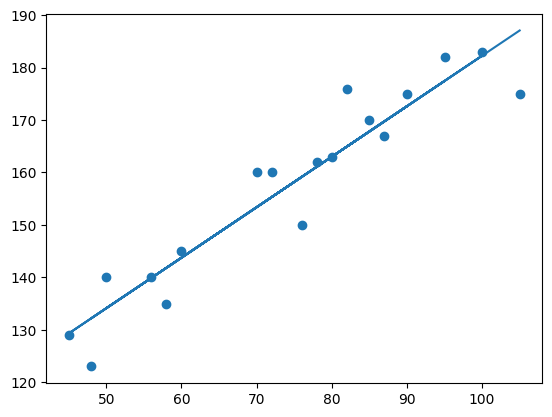

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [37]:
y_pred_test=regressor.predict(X_test)

In [38]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

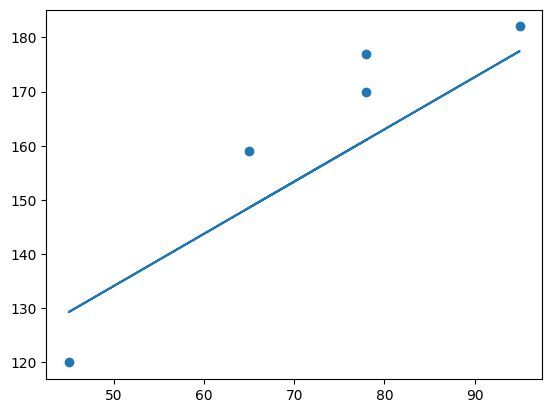

In [39]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [40]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

122.95263204287963
10.788901165891936
11.088400788340925


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [ ]:
print(score)

0.7431463490421629


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.7431463490421629


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6147195235632443

In [ ]:
regressor.predict(scaler.transform([[75]]))

array([159.26608245])

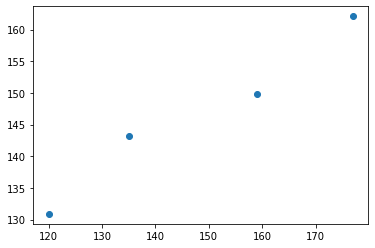

In [ ]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)



In [ ]:
## Residuals
residuals=y_test-y_pred_test

residuals



0    -10.882786
17     9.195016
15    14.895588
1     -8.182214
Name: Height, dtype: float64

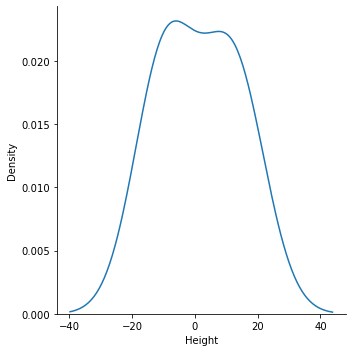

In [ ]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")



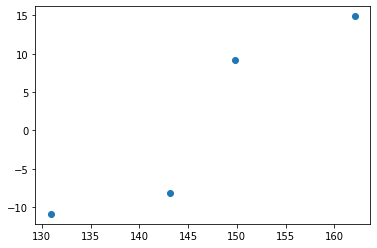

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## Using OLS

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.058
Method:                 Least Squares   F-statistic:                             0.1279
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                       0.726
Time:                        16:01:23   Log-Likelihood:                         -104.31
No. Observations:                  16   AIC:                                      210.6
Df Residuals:                      15   BIC:                                      211.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\win10\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
regressor.coef_

array([15.14687925])